Data from [kaggle:Leads](https://www.kaggle.com/ashydv/leads-dataset?select=image.jpg)

Classification models are often used for marketing purposes, and one of the problems it
solves is lead scoring. 
A `lead` is a potential customer who may convert (**became an
actual customer**) or not. In this case, the conversion is the target we want to predict.

We may notice that the lead scoring problem is very similar to churn
prediction, but in one case we want to get a new client to sign a contract with us, and
in another case we want a client not to cancel the contract. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('leads-dataset/Leads.csv')

## Initial data preparation

In [3]:
df.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


In [4]:
df.drop('Prospect ID',axis=1,inplace=True)

In [5]:
df.dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article              

All columns have the correct dtype

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

# Exploratory data analysis

In [7]:
Missing_Values = df.isna().sum().to_frame(name='Missing Values').sort_values('Missing Values', ascending=False)
Missing_Values

,Missing Values
lead_quality,4767
asymmetrique_activity_index,4218
asymmetrique_profile_index,4218
asymmetrique_profile_score,4218
asymmetrique_activity_score,4218
tags,3353
lead_profile,2709
what_matters_most_to_you_in_choosing_a_course,2709
what_is_your_current_occupation,2690
country,2461


In [8]:
Missing_Values[Missing_Values['Missing Values']>3000]

,Missing Values
lead_quality,4767
asymmetrique_activity_index,4218
asymmetrique_profile_index,4218
asymmetrique_profile_score,4218
asymmetrique_activity_score,4218
tags,3353


In [9]:
for i in df.columns:
    if df[i].isna().sum()>3000:
        df.drop(i, axis=1, inplace=True)

### `checking each column`

1-lead_source

In [10]:
df.lead_source.value_counts().to_frame()

,lead_source
google,2873
direct_traffic,2543
olark_chat,1755
organic_search,1154
reference,534
welingak_website,142
referral_sites,125
facebook,55
bing,6
click2call,4


the majority seems to come from google


So here, we fill missing values with the most frequent one

In [11]:
df.lead_source.fillna('google', inplace=True)

In [12]:
df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,...,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,660737,api,olark_chat,no,no,0,0.0,0,0.0,page_visited_on_website,...,no,no,no,no,no,select,select,no,no,modified


2- last_activity	

In [13]:
df.last_activity.value_counts()

email_opened                    3437
sms_sent                        2745
olark_chat_conversation          973
page_visited_on_website          640
converted_to_lead                428
email_bounced                    326
email_link_clicked               267
form_submitted_on_website        116
unreachable                       93
unsubscribed                      61
had_a_phone_conversation          30
approached_upfront                 9
view_in_browser_link_clicked       6
email_received                     2
email_marked_spam                  2
visited_booth_in_tradeshow         1
resubscribed_to_emails             1
Name: last_activity, dtype: int64

In [14]:
df['last_activity'].fillna('Other', inplace=True)

In [15]:
df.city.value_counts()

mumbai                         3222
select                         2249
thane_&_outskirts               752
other_cities                    686
other_cities_of_maharashtra     457
other_metro_cities              380
tier_ii_cities                   74
Name: city, dtype: int64

In [16]:
df['city'].fillna('select', inplace=True)

In [17]:
df['specialization'].value_counts()

select                               1942
finance_management                    976
human_resource_management             848
marketing_management                  838
operations_management                 503
business_administration               403
it_projects_management                366
supply_chain_management               349
banking,_investment_and_insurance     338
travel_and_tourism                    203
media_and_advertising                 203
international_business                178
healthcare_management                 159
hospitality_management                114
e-commerce                            112
retail_management                     100
rural_and_agribusiness                 73
e-business                             57
services_excellence                    40
Name: specialization, dtype: int64

In [18]:
df['specialization'].fillna('select', inplace=True)

In [19]:
df.how_did_you_hear_about_x_education.value_counts()

select                   5043
online_search             808
word_of_mouth             348
student_of_someschool     310
other                     186
multiple_sources          152
advertisements             70
social_media               67
email                      26
sms                        23
Name: how_did_you_hear_about_x_education, dtype: int64

In [20]:
df['how_did_you_hear_about_x_education'].fillna('select', inplace=True)


In [21]:
df.country.value_counts()

india                   6492
united_states             69
united_arab_emirates      53
singapore                 24
saudi_arabia              21
united_kingdom            15
australia                 13
qatar                     10
hong_kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south_africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific_region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [22]:
df['country'].fillna('not_known', inplace=True)


In [23]:
df.what_is_your_current_occupation.value_counts()

unemployed              5600
working_professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: what_is_your_current_occupation, dtype: int64

In [24]:
df['what_is_your_current_occupation'].fillna('other', inplace=True)


In [25]:
df.lead_profile.value_counts()

select                         4146
potential_lead                 1613
other_leads                     487
student_of_someschool           241
lateral_student                  24
dual_specialization_student      20
Name: lead_profile, dtype: int64

In [26]:
df['lead_profile'].fillna('select', inplace=True)


In [27]:
df.what_matters_most_to_you_in_choosing_a_course.value_counts()

better_career_prospects      6528
flexibility_&_convenience       2
other                           1
Name: what_matters_most_to_you_in_choosing_a_course, dtype: int64

In [28]:
df['what_matters_most_to_you_in_choosing_a_course'].fillna('other', inplace=True)


In [29]:
df.totalvisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: totalvisits, dtype: int64

In [30]:
df['totalvisits'].fillna(df['totalvisits'].mean() , inplace=True)


In [31]:
df.page_views_per_visit.value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: page_views_per_visit, Length: 114, dtype: int64

In [32]:
df['page_views_per_visit'].fillna(df['page_views_per_visit'].mean() , inplace=True)

In [33]:
df.isnull().sum().all()

False

now we dealt with NAN values

# `spliting data and selecting X , Y`

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop('converted', axis=1)
y = df.converted


In [36]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [37]:
# Select the object (string) columns
mask1 = X_train.dtypes == object
categorical_cols = X_train.columns[mask1]
categorical_cols

Index(['lead_origin', 'lead_source', 'do_not_email', 'do_not_call',
       'last_activity', 'country', 'specialization',
       'how_did_you_hear_about_x_education', 'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [38]:
mask2 = X_train.dtypes != object
numerical_cols = X_train.columns[mask2]
numerical_cols

Index(['lead_number', 'totalvisits', 'total_time_spent_on_website',
       'page_views_per_visit'],
      dtype='object')

## Feature importance

In [39]:
X_train[categorical_cols].nunique()

lead_origin                                       5
lead_source                                      15
do_not_email                                      2
do_not_call                                       2
last_activity                                    15
country                                          31
specialization                                   19
how_did_you_hear_about_x_education               10
what_is_your_current_occupation                   6
what_matters_most_to_you_in_choosing_a_course     2
search                                            2
magazine                                          1
newspaper_article                                 2
x_education_forums                                2
newspaper                                         2
digital_advertisement                             2
through_recommendations                           2
receive_more_updates_about_our_courses            1
update_me_on_supply_chain_content                 1
get_updates_

In [40]:
from IPython.display import display

In [41]:
global_mean = np.round(df.converted.mean(),4)
print(f'{global_mean*100}% of leads have been successfully converted.')

38.54% of leads have been successfully converted.


In [42]:
for col in categorical_cols:
    df_group = df.groupby(by=col).converted.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
lead_origin,,,
api,0.311453,-0.073947,0.808128
landing_page_submission,0.361850,-0.023550,0.938895
lead_add_form,0.924791,0.539391,2.399562
lead_import,0.236364,-0.149036,0.613294
quick_add_form,1.000000,0.614600,2.594707


,mean,diff,risk
lead_source,,,
bing,0.166667,-0.218733,0.432451
blog,0.000000,-0.385400,0.000000
click2call,0.750000,0.364600,1.946030
direct_traffic,0.321667,-0.063733,0.834632
facebook,0.236364,-0.149036,0.613294
google,0.404263,0.018863,1.048943
live_chat,1.000000,0.614600,2.594707
nc_edm,1.000000,0.614600,2.594707
olark_chat,0.255271,-0.130129,0.662353


,mean,diff,risk
do_not_email,,,
no,0.404773,0.019373,1.050268
yes,0.160763,-0.224637,0.417133


,mean,diff,risk
do_not_call,,,
no,0.385257,-0.000143,0.999628
yes,1.000000,0.614600,2.594707


,mean,diff,risk
last_activity,,,
Other,0.786408,0.401008,2.040498
approached_upfront,1.000000,0.614600,2.594707
converted_to_lead,0.126168,-0.259232,0.327370
email_bounced,0.079755,-0.305645,0.206940
email_link_clicked,0.273408,-0.111992,0.709414
email_marked_spam,1.000000,0.614600,2.594707
email_opened,0.364562,-0.020838,0.945932
email_received,1.000000,0.614600,2.594707
form_submitted_on_website,0.241379,-0.144021,0.626309


,mean,diff,risk
country,,,
asia/pacific_region,0.500000,0.114600,1.297353
australia,0.230769,-0.154631,0.598778
bahrain,0.571429,0.186029,1.482690
bangladesh,0.500000,0.114600,1.297353
belgium,0.000000,-0.385400,0.000000
canada,0.000000,-0.385400,0.000000
china,0.000000,-0.385400,0.000000
denmark,1.000000,0.614600,2.594707
france,0.500000,0.114600,1.297353


,mean,diff,risk
specialization,,,
"banking,_investment_and_insurance",0.494083,0.108683,1.282000
business_administration,0.444169,0.058769,1.152488
e-business,0.368421,-0.016979,0.955945
e-commerce,0.357143,-0.028257,0.926681
finance_management,0.446721,0.061321,1.159111
healthcare_management,0.496855,0.111455,1.289194
hospitality_management,0.421053,0.035653,1.092508
human_resource_management,0.457547,0.072147,1.187201
international_business,0.359551,-0.025849,0.932928


,mean,diff,risk
how_did_you_hear_about_x_education,,,
advertisements,0.457143,0.071743,1.186152
email,0.500000,0.114600,1.297353
multiple_sources,0.368421,-0.016979,0.955945
online_search,0.424505,0.039105,1.101466
other,0.403226,0.017826,1.046253
select,0.374345,-0.011055,0.971315
sms,0.217391,-0.168009,0.564067
social_media,0.417910,0.032510,1.084355
student_of_someschool,0.461290,0.075890,1.196913


,mean,diff,risk
what_is_your_current_occupation,,,
businessman,0.625000,0.239600,1.621692
housewife,1.000000,0.614600,2.594707
other,0.140429,-0.244971,0.364371
student,0.371429,-0.013971,0.963748
unemployed,0.435893,0.050493,1.131014
working_professional,0.916431,0.531031,2.377869


,mean,diff,risk
what_matters_most_to_you_in_choosing_a_course,,,
better_career_prospects,0.488664,0.103264,1.267940
flexibility_&_convenience,0.500000,0.114600,1.297353
other,0.136531,-0.248869,0.354259


,mean,diff,risk
search,,,
no,0.385432,0.000032,1.000084
yes,0.357143,-0.028257,0.926681


,mean,diff,risk
magazine,,,
no,0.38539,-0.00001,0.999973


,mean,diff,risk
newspaper_article,,,
no,0.385365,-0.000035,0.999909
yes,0.500000,0.114600,1.297353


,mean,diff,risk
x_education_forums,,,
no,0.385431,0.000031,1.000081
yes,0.000000,-0.385400,0.000000


,mean,diff,risk
newspaper,,,
no,0.385431,0.000031,1.000081
yes,0.000000,-0.385400,0.000000


,mean,diff,risk
digital_advertisement,,,
no,0.385448,0.000048,1.000125
yes,0.250000,-0.135400,0.648677


,mean,diff,risk
through_recommendations,,,
no,0.385140,-0.000260,0.999326
yes,0.714286,0.328886,1.853362


,mean,diff,risk
receive_more_updates_about_our_courses,,,
no,0.38539,-0.00001,0.999973


,mean,diff,risk
update_me_on_supply_chain_content,,,
no,0.38539,-0.00001,0.999973


,mean,diff,risk
get_updates_on_dm_content,,,
no,0.38539,-0.00001,0.999973


,mean,diff,risk
lead_profile,,,
dual_specialization_student,1.000000,0.614600,2.594707
lateral_student,0.958333,0.572933,2.486594
other_leads,0.369610,-0.015790,0.959029
potential_lead,0.785493,0.400093,2.038124
select,0.300802,-0.084598,0.780494
student_of_someschool,0.037344,-0.348056,0.096898


,mean,diff,risk
city,,,
mumbai,0.406269,0.020869,1.054150
other_cities,0.402332,0.016932,1.043935
other_cities_of_maharashtra,0.439825,0.054425,1.141217
other_metro_cities,0.407895,0.022495,1.058367
select,0.342600,-0.042800,0.888947
thane_&_outskirts,0.449468,0.064068,1.166238
tier_ii_cities,0.337838,-0.047562,0.876590


,mean,diff,risk
i_agree_to_pay_the_amount_through_cheque,,,
no,0.38539,-0.00001,0.999973


,mean,diff,risk
a_free_copy_of_mastering_the_interview,,,
no,0.398457,0.013057,1.033880
yes,0.356648,-0.028752,0.925398


,mean,diff,risk
last_notable_activity,,,
approached_upfront,1.000000,0.614600,2.594707
email_bounced,0.150000,-0.235400,0.389206
email_link_clicked,0.260116,-0.125284,0.674924
email_marked_spam,1.000000,0.614600,2.594707
email_opened,0.369296,-0.016104,0.958215
email_received,1.000000,0.614600,2.594707
form_submitted_on_website,0.000000,-0.385400,0.000000
had_a_phone_conversation,0.928571,0.543171,2.409371
modified,0.229821,-0.155579,0.596318


In [43]:
from sklearn.metrics import mutual_info_score

In [44]:
def calculate_mi(series):
    return mutual_info_score(series, df.converted)

df_mi = df[categorical_cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

df_mi

,MI
what_is_your_current_occupation,0.095197
last_activity,0.088512
lead_profile,0.082869
last_notable_activity,0.073860
lead_source,0.061560
what_matters_most_to_you_in_choosing_a_course,0.060058
lead_origin,0.056251
specialization,0.014624
do_not_email,0.010327
country,0.004731


In [45]:
categorical_final = list(df_mi[df_mi['MI']>0.01].index)
categorical_final

['what_is_your_current_occupation',
 'last_activity',
 'lead_profile',
 'last_notable_activity',
 'lead_source',
 'what_matters_most_to_you_in_choosing_a_course',
 'lead_origin',
 'specialization',
 'do_not_email']

In [46]:
df[numerical_cols].corrwith(df.converted).to_frame('correlation')

,correlation
lead_number,0.025157
totalvisits,0.030091
total_time_spent_on_website,0.362483
page_views_per_visit,-0.003294


## One-hot encoding

In [47]:
from sklearn.feature_extraction import DictVectorizer

In [48]:
train_dict = X_train[categorical_final+list(numerical_cols)].to_dict(orient='records')
test_dict = X_test[categorical_final + list(numerical_cols)].to_dict(orient='records')
val_dict = X_val[categorical_final + list(numerical_cols)].to_dict(orient='records')

In [49]:
train_dict[0]

{'what_is_your_current_occupation': 'unemployed',
 'last_activity': 'email_opened',
 'lead_profile': 'potential_lead',
 'last_notable_activity': 'modified',
 'lead_source': 'reference',
 'what_matters_most_to_you_in_choosing_a_course': 'better_career_prospects',
 'lead_origin': 'lead_add_form',
 'specialization': 'human_resource_management',
 'do_not_email': 'no',
 'lead_number': 655270,
 'totalvisits': 0.0,
 'total_time_spent_on_website': 0,
 'page_views_per_visit': 0.0}

In [50]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [51]:
X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)
X_val = dv.transform(val_dict)

In [52]:
X_train.shape

(4952, 86)

## Training logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [56]:
y_pred = model.predict_proba(X_val)[:, 1]

In [57]:
y_pred

array([0.23394343, 0.45060033, 0.58784988, ..., 0.21780212, 0.29633729,
       0.23439713])

In [71]:
convert = (y_pred>0.5).astype(int)

In [73]:
(convert==y_val.values).mean()

0.7233606557377049

we have accuracy = 72%

In [84]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0,1,21)
accs = []

for i in thresholds:
    churn = y_pred>=i
    acc = accuracy_score(y_val, churn)
    accs.append(acc)

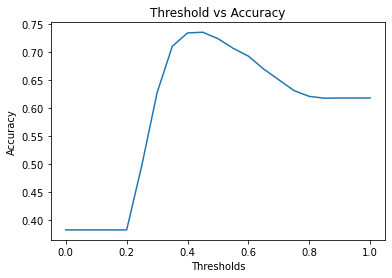

In [85]:
plt.plot(thresholds, accs)
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.title('Threshold vs Accuracy')
plt.show()

In [93]:
convert2 = (y_pred>0.4).astype(int)
(convert2==y_val.values).mean()

0.7336065573770492

In [94]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score =',roc_auc_score(y_val, convert2)*100,'%')

roc_auc_score = 70.39162009941458 %
